In [2]:
import numpy as np
import pickle
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [3]:
MAX_SEQ_LEN = 10
MIN_SEQ_LEN = 2

# padded test data
with open('../ap_1.pkl','rb') as fp:
    sin = np.array(pickle.load(fp))
    seq=[]
    for i in range(len(sin)):
        seq.append(np.array(sin[i][0]))
    
    sinee = pad_sequences(seq,maxlen=MAX_SEQ_LEN,dtype='float32')
    for i in range(len(sin)):
        sin[i][0] = np.array(sinee[i])


(10000,)
((9990, 10, 1), (9990, 1))


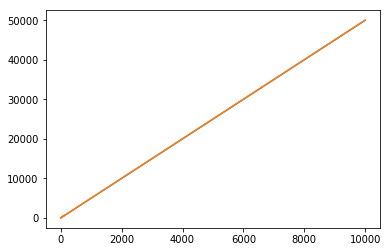

In [4]:
# Create training data
sin_wave = np.array([x for x in np.arange(0,50000,5)])
print(sin_wave.shape)
x=[]
y=[]
i=0
while(i<len(sin_wave)-MAX_SEQ_LEN):
    seq_len = np.random.randint(MIN_SEQ_LEN,MAX_SEQ_LEN+1)

    x.append(sin_wave[i:i+seq_len])
    y.append(sin_wave[i+seq_len])
    i+=1
#     i+=seq_len
# print x[:5],y[:5]
plt.plot(sin_wave)
plt.plot(y)
padX = pad_sequences(x, maxlen=MAX_SEQ_LEN,dtype='float32')
x = np.array(padX)
x = np.expand_dims(x, axis=2)
y = np.array(y)
y = np.expand_dims(y, axis=1)
x,y = shuffle(x,y)
print(x.shape, y.shape)

# plt.plot(np.stack(x[0],y[0]))

In [33]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
 

n_steps =  10

X, y = (x,y)
print(X.shape, y.shape)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Bidirectional(LSTM(80, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(80, activation='relu')))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
hist=model.fit(X, y, epochs=4,batch_size=30, verbose=1,validation_split=0.2)
# demonstrate prediction
x_input = array([70, 71, 72,73,74,75,76,77,78,79])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

((9990, 10, 1), (9990, 1))


ValueError: Input 0 is incompatible with layer bidirectional_3: expected ndim=3, found ndim=2

In [10]:
x_input = array([0, 0, 0,0,0,0,0,0,78000,78005])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

1/1 [==============================] - 4s 4s/step
[[78012.3]]


In [32]:
from keras.models import load_model
model.save('model_ap1.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 160)               52480     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 52,641
Trainable params: 52,641
Non-trainable params: 0
_________________________________________________________________


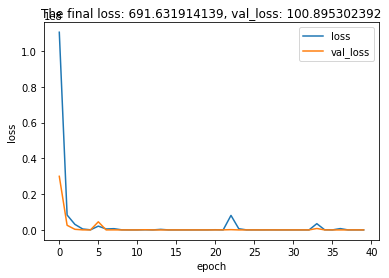

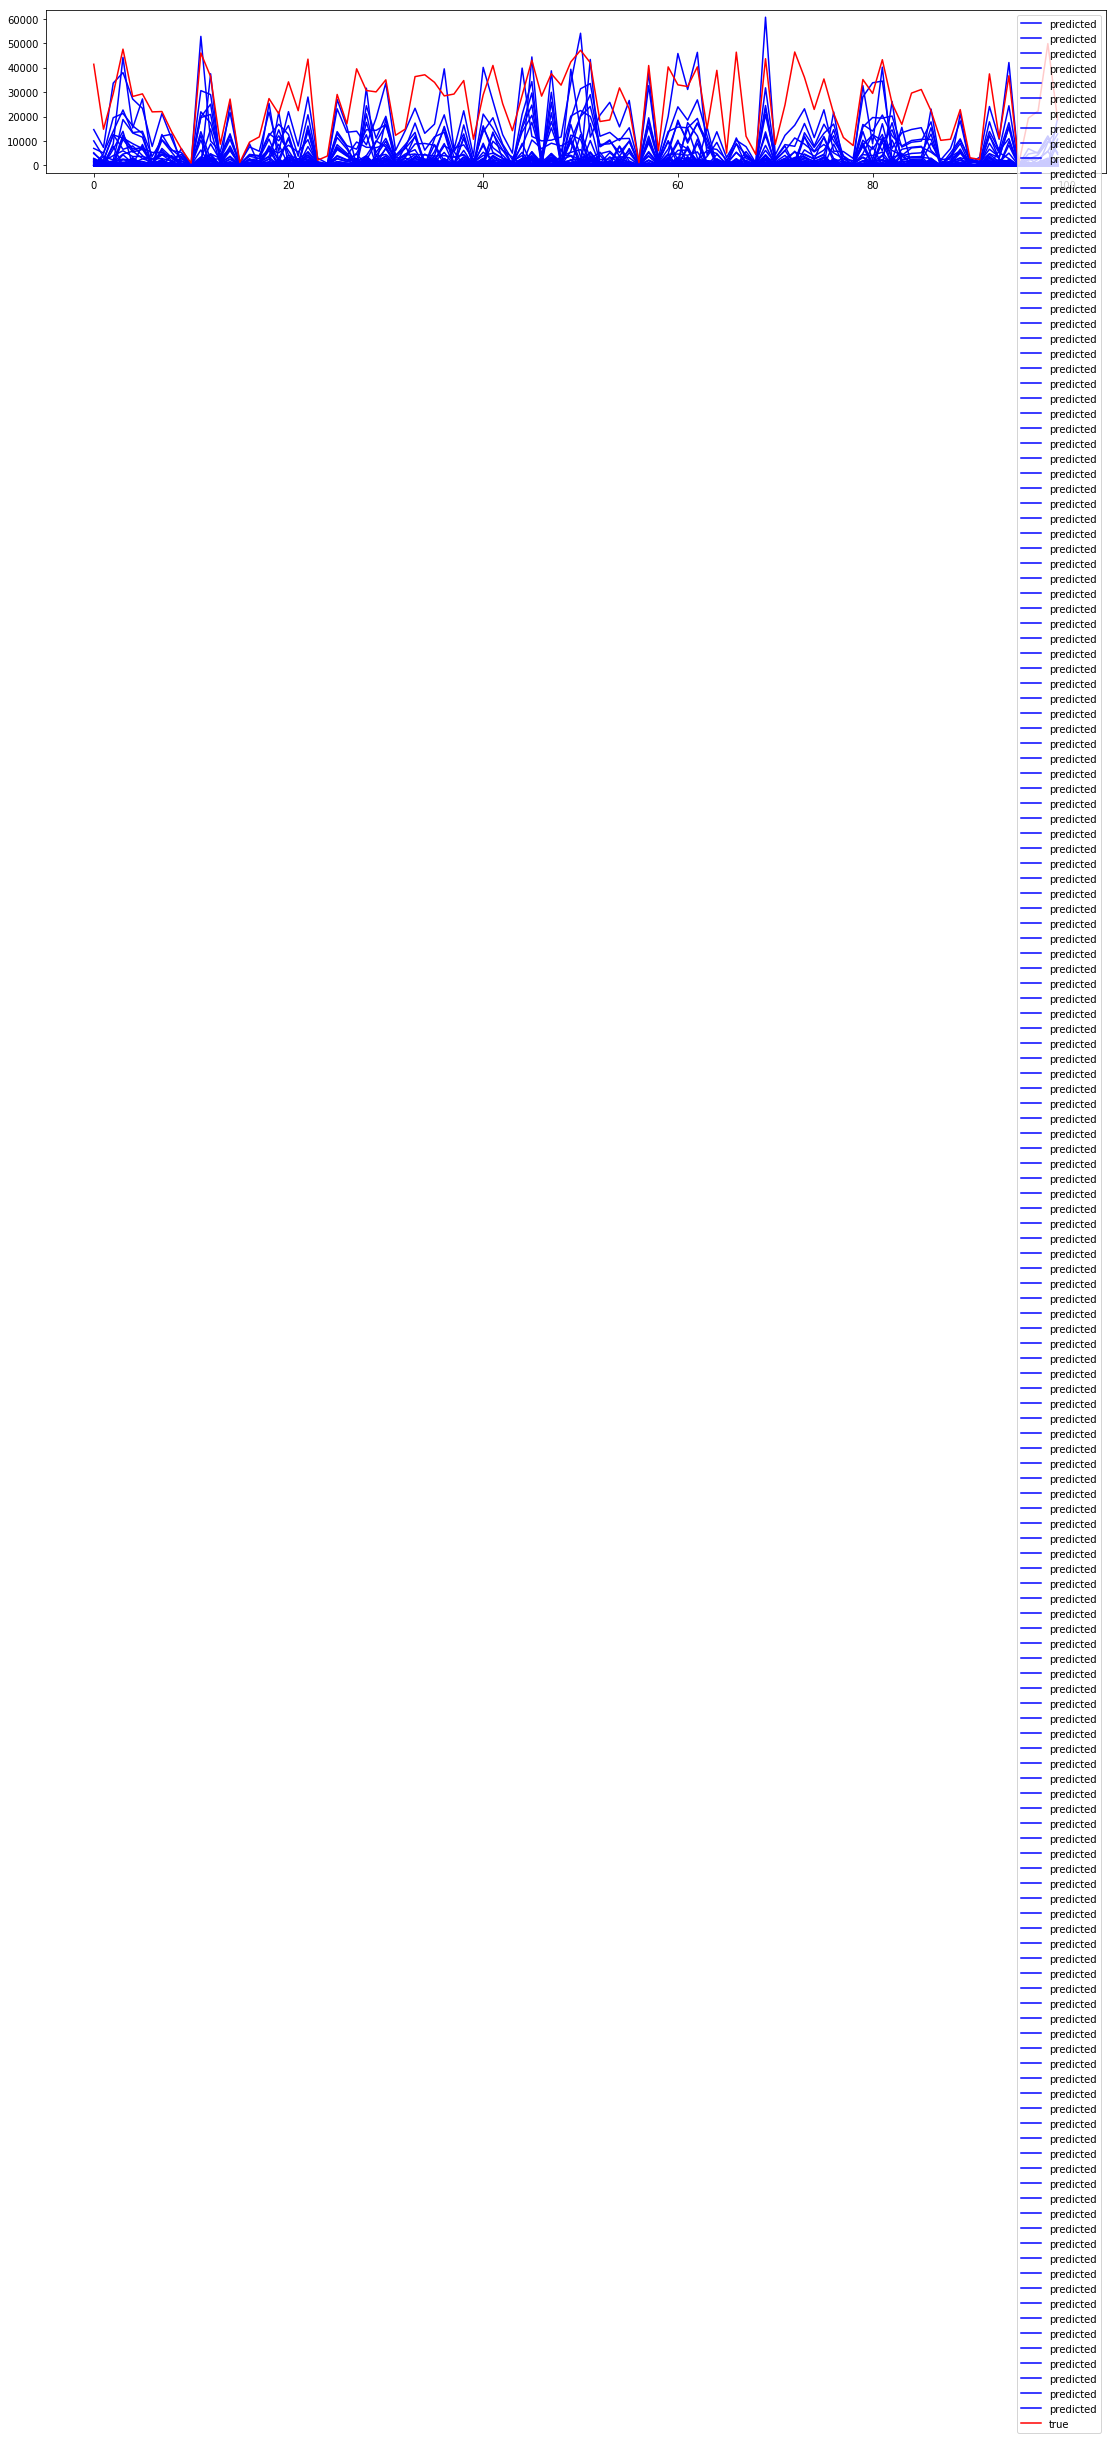

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# hist = model.fit(X_train, y_train, batch_size=120, epochs=1000, 
#                  verbose=True,validation_split=0.05)
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final loss: {}, val_loss: {}".format(hist.history["loss"][-1],hist.history["val_loss"][-1]))
plt.legend()
plt.show()
y_pred = model.predict(X_test)
plt.figure(figsize=(19,3))
# print(y_test[:2])
# print(y_pred[:2])
plt.plot(y_pred[:100],'b-',label="predicted")
plt.plot(y_test[:100], 'r-', label="true")
plt.legend()
plt.show()

0
((10, 10, 1), (10, 1))


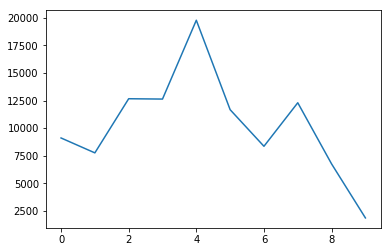

In [20]:
# Creating test data
l = np.random.randint(len(sin))
print l
sin_test=[]
sin_label=[]
i=0
while(i<len(sin)):
    sin_test.append(sin[i][0])
    sin_label.append(sin[i][1])
    i+=1


sin_test = np.expand_dims(sin_test, axis=2)
sin_label = np.array(sin_label)
sin_label = np.expand_dims(sin_label, axis=1)
plt.plot(sin_label)
print(sin_test.shape, sin_label.shape)

10/10 [==============================] - 2s 188ms/step
40.12942886352539


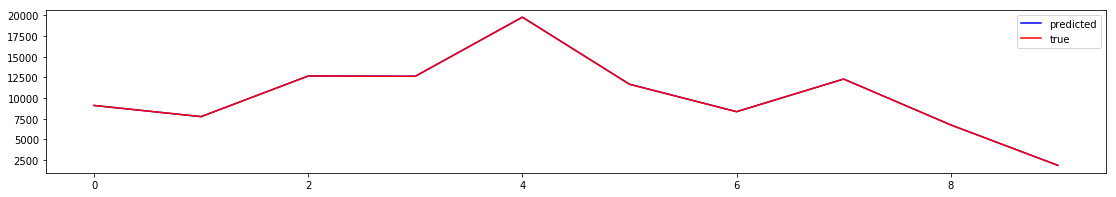

((10, 10, 1), (10, 1))
10/10 [==============================] - 0s 243us/step
26.89060401916504


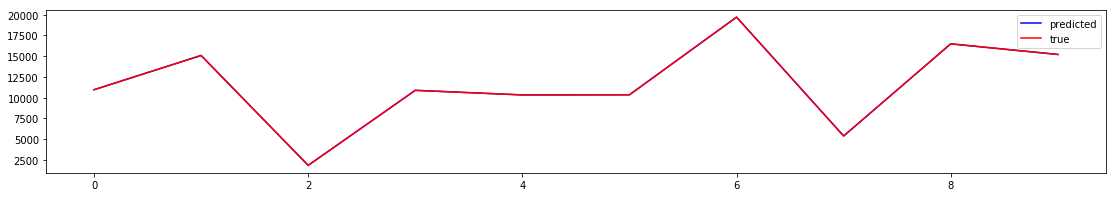

((10, 10, 1), (10, 1))
10/10 [==============================] - 0s 225us/step
72.48715209960938


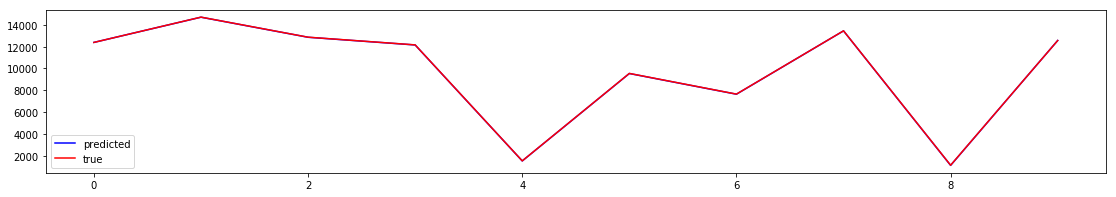

((10, 10, 1), (10, 1))
10/10 [==============================] - 0s 217us/step
102.03791809082031


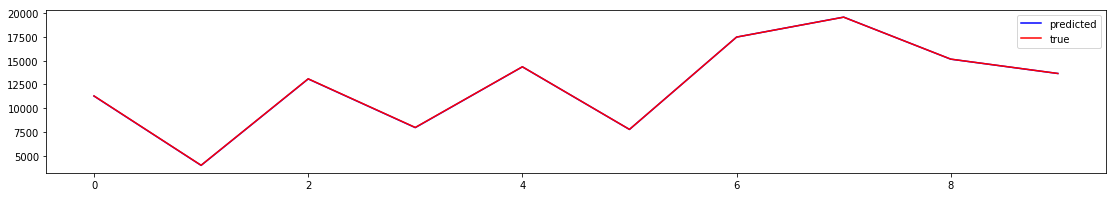

((10, 10, 1), (10, 1))
10/10 [==============================] - 0s 222us/step
257.9811706542969


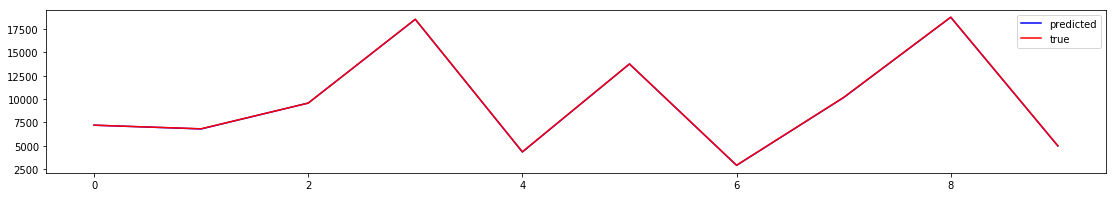

((10, 10, 1), (10, 1))


In [50]:
# padded test data

model = load_model('model_ap1.h5')
files = ["ap_1","ap_2","ap_3","ap_4","ap_5"]
for filename in files:
    x_orig=[]
    sin=[]
    seq=[]
    
    with open('../'+filename+'.pkl','rb') as fp:
        sin = np.array(pickle.load(fp))
    for i in range(len(sin)):
        x_orig.append(np.array(sin[i][0]))
        seq.append(np.array(sin[i][0]))

    sinee = pad_sequences(seq,maxlen=MAX_SEQ_LEN,dtype='float32')
    for i in range(len(sin)):
        sin[i][0] = np.array(sinee[i])
    
    sin_test=[]
    sin_label=[]
    i=0
    while(i<len(sin)):
        sin_test.append(sin[i][0])
        sin_label.append(sin[i][1])
        i+=1


    sin_test = np.expand_dims(sin_test, axis=2)
    sin_label = np.array(sin_label)
    sin_label = np.expand_dims(sin_label, axis=1)
    # sin_test,sin_label = shuffle(sin_test,sin_label)
    print( model.evaluate(sin_test, sin_label))
    y_pred = model.predict(sin_test)
    plt.figure(figsize=(19,3))
    # print(sin_label)
    # print(y_pred)
    plt.plot(y_pred[:],'b-',label="predicted")
    plt.plot(sin_label[:], 'r-', label="true")
    plt.legend()
    plt.show()
    print(sin_test.shape, sin_label.shape)

    with open (filename+".txt",'w') as f:
        for i in range(len(y_pred)):
            f.write(str(x_orig[i]))
            f.write(" "+str(y_pred[i][0])+"\n")

1/1 [==============================] - 0s 2ms/step
0.86431884765625
1/1 [==============================] - 0s 2ms/step
4.8365631103515625
1/1 [==============================] - 0s 4ms/step
42.19923400878906
1/1 [==============================] - 0s 3ms/step
42.16117858886719
1/1 [==============================] - 0s 2ms/step
116.82569885253906
1/1 [==============================] - 0s 2ms/step
67.91755676269531
1/1 [==============================] - 0s 1ms/step
9.105777740478516
1/1 [==============================] - 0s 2ms/step
17.62523651123047
1/1 [==============================] - 0s 2ms/step
7.378332138061523
1/1 [==============================] - 0s 2ms/step
92.34243774414062
((10, 10, 1), (10, 1))
10/10 [==============================] - 0s 209us/step
40.12942886352539


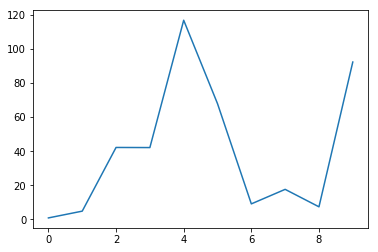

In [15]:
for i in range(len(sin)):
    sin_test=sin[i][0]
    sin_label=sin[i][1]
#     plt.plot(sin_test)dd
#     print(sin_test.shape)
    sin_test = np.expand_dims(sin_test, axis=0)
    sin_test = np.expand_dims(sin_test, axis=2)
#     print(sin_test.shape)
    
#     sin_label = np.array(sin_label)
    sin_label = np.expand_dims(sin_label, axis=0)
    sin_label = np.expand_dims(sin_label, axis=1)
#     sin_test,sin_label = shuffle(sin_test,sin_label)
#     print(sin_test.shape, sin_label.shape)
    print model.evaluate(sin_test,sin_label)
# plt.show()
xt=[]
yt=[]
for i in range(len(sin)):
    xt.append(sin[i][0])
    yt.append(sin[i][1])
    
xt = np.array(xt)
xt = np.expand_dims(xt, axis=2)
yt = np.array(yt)
yt = np.expand_dims(yt, axis=1)
print(xt.shape,yt.shape)
print model.evaluate(xt,yt)
yt_pred = model.predict(xt)
# plt.plot(yt)
# plt.plot(yt_pred)
# plt.show()
plt.plot((yt_pred-yt)*(yt_pred-yt))